In [2]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 6.6 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.0 MB/s  0:00:00


In [3]:
!pip install missingno


In [4]:
# Cell 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, fbeta_score, classification_report,
    roc_auc_score, roc_curve
)
from mlxtend.plotting import plot_decision_regions
import missingno as msno

sns.set(style="whitegrid")
print("✅ Libraries Imported Successfully")


✅ Libraries Imported Successfully


In [5]:
# Cell 2: Load dataset
data = pd.read_csv("diabetes.csv")
print("✅ Data Loaded Successfully")
print(data.head())


✅ Data Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
# Cell 3: Check missing values and describe data
print("\nMissing values before replacement:")
print(data.isnull().any())

print("\n📊 Statistical summary:")
print(data.describe().T)



Missing values before replacement:
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

📊 Statistical summary:
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age   

In [7]:
# Cell 4: Replace zero values with NaN for selected columns
data_copy = data.copy(deep=True)
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_copy[cols] = data_copy[cols].replace(0, np.nan)

print("\nMissing values after replacement:")
print(data_copy.isnull().sum())



Missing values after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


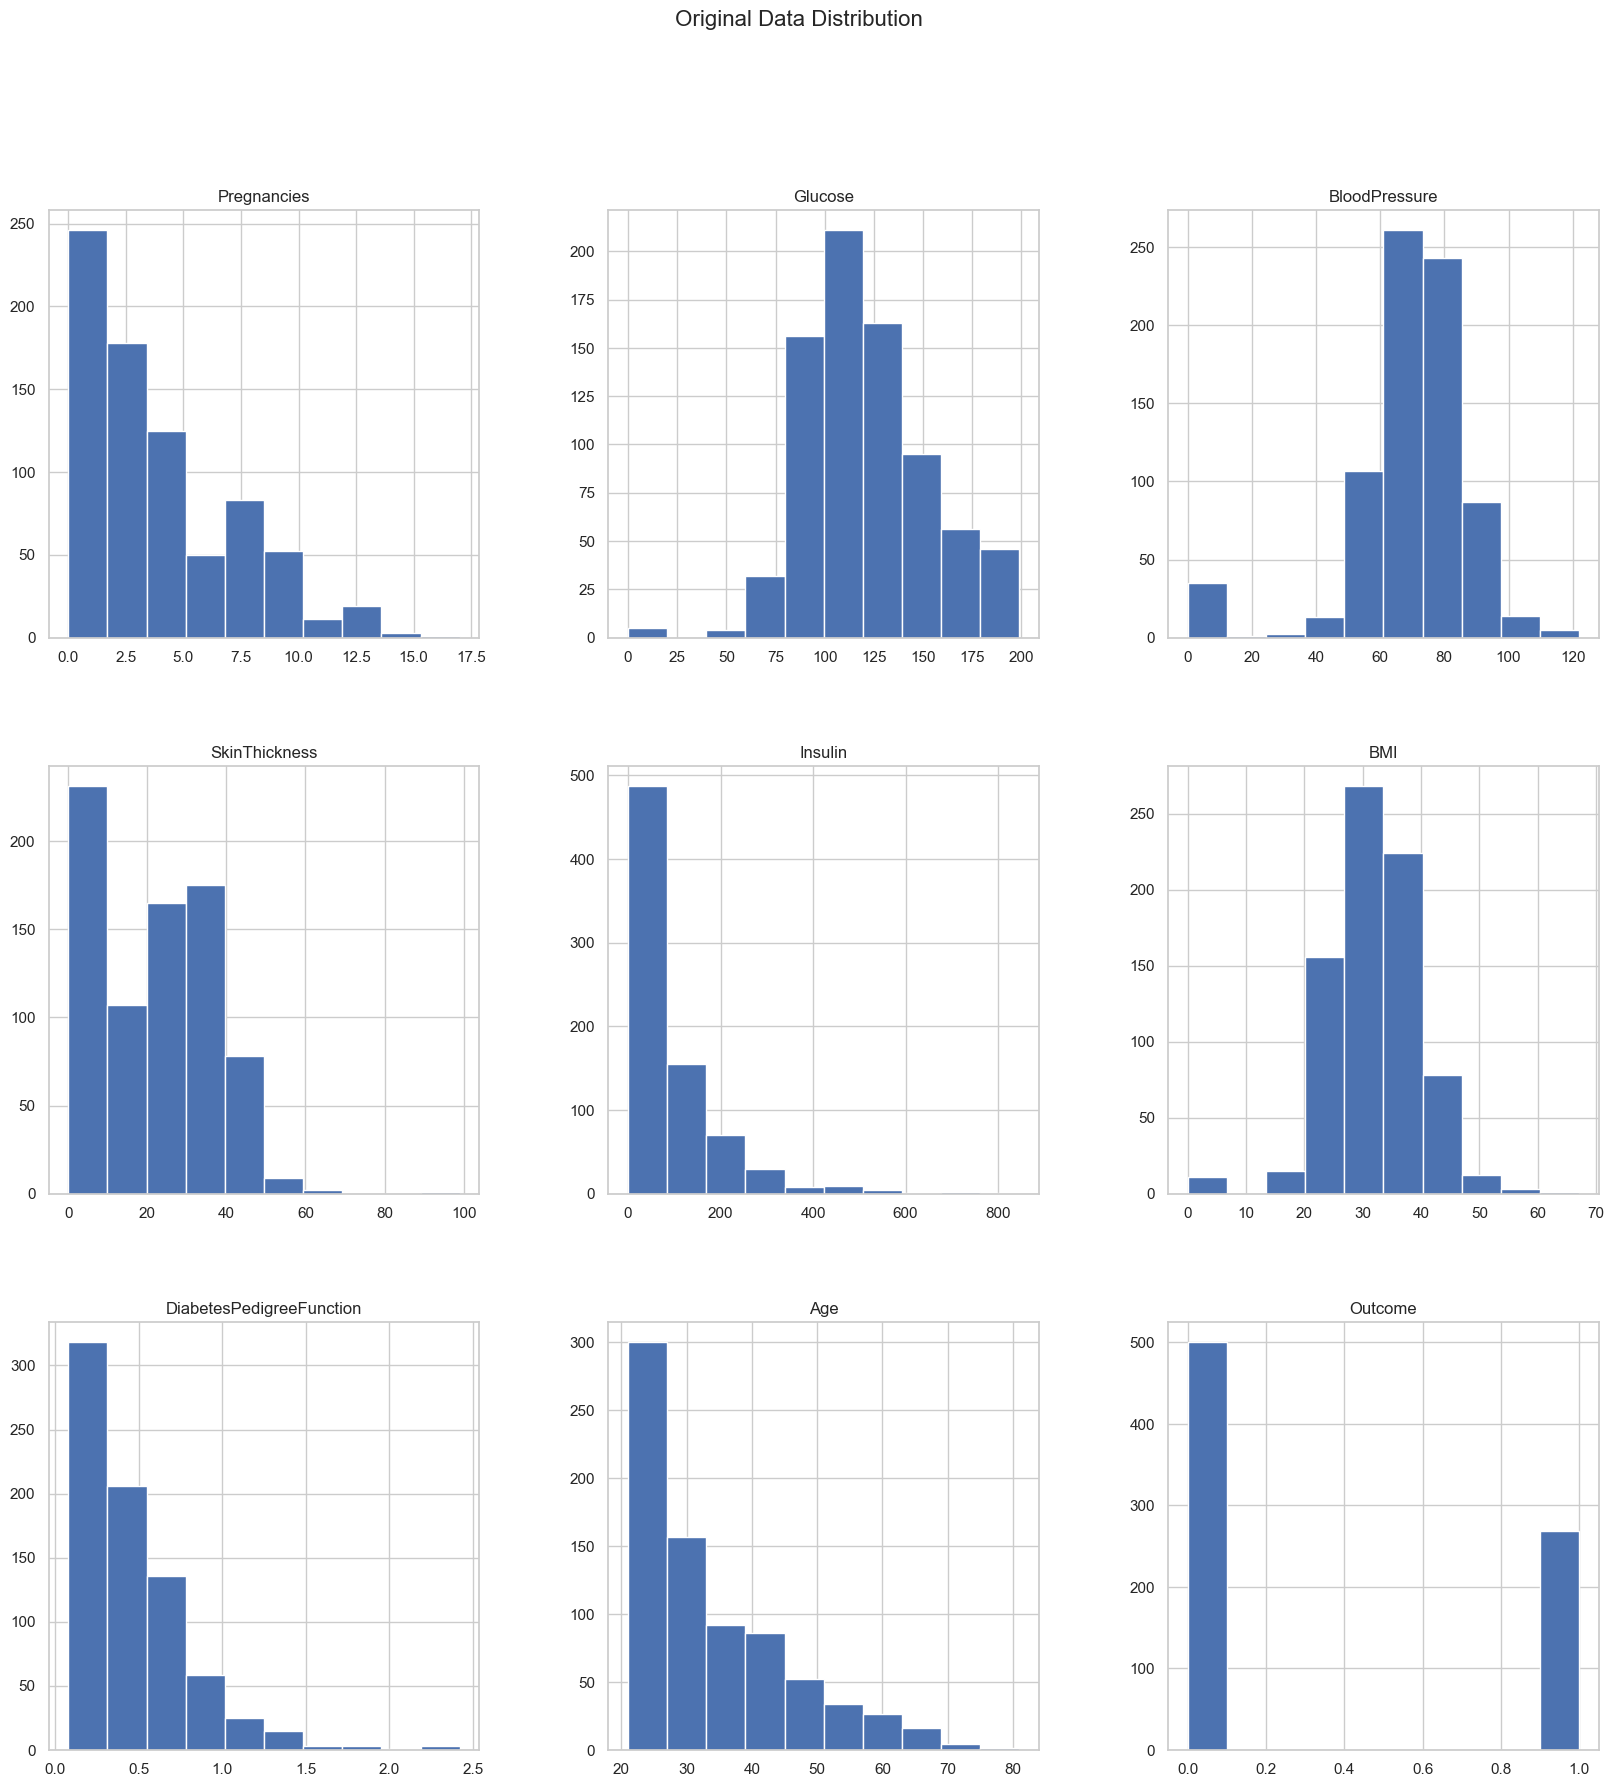

In [8]:
# Cell 5: Plot histogram before filling missing values
data.hist(figsize=(20, 20))
plt.suptitle("Original Data Distribution", fontsize=16)
plt.show()


In [9]:
# Cell 6: Fill missing values with mean or median
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace=True)

print("✅ Missing values filled successfully")


✅ Missing values filled successfully


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19736\1216251858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19736\1216251858.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

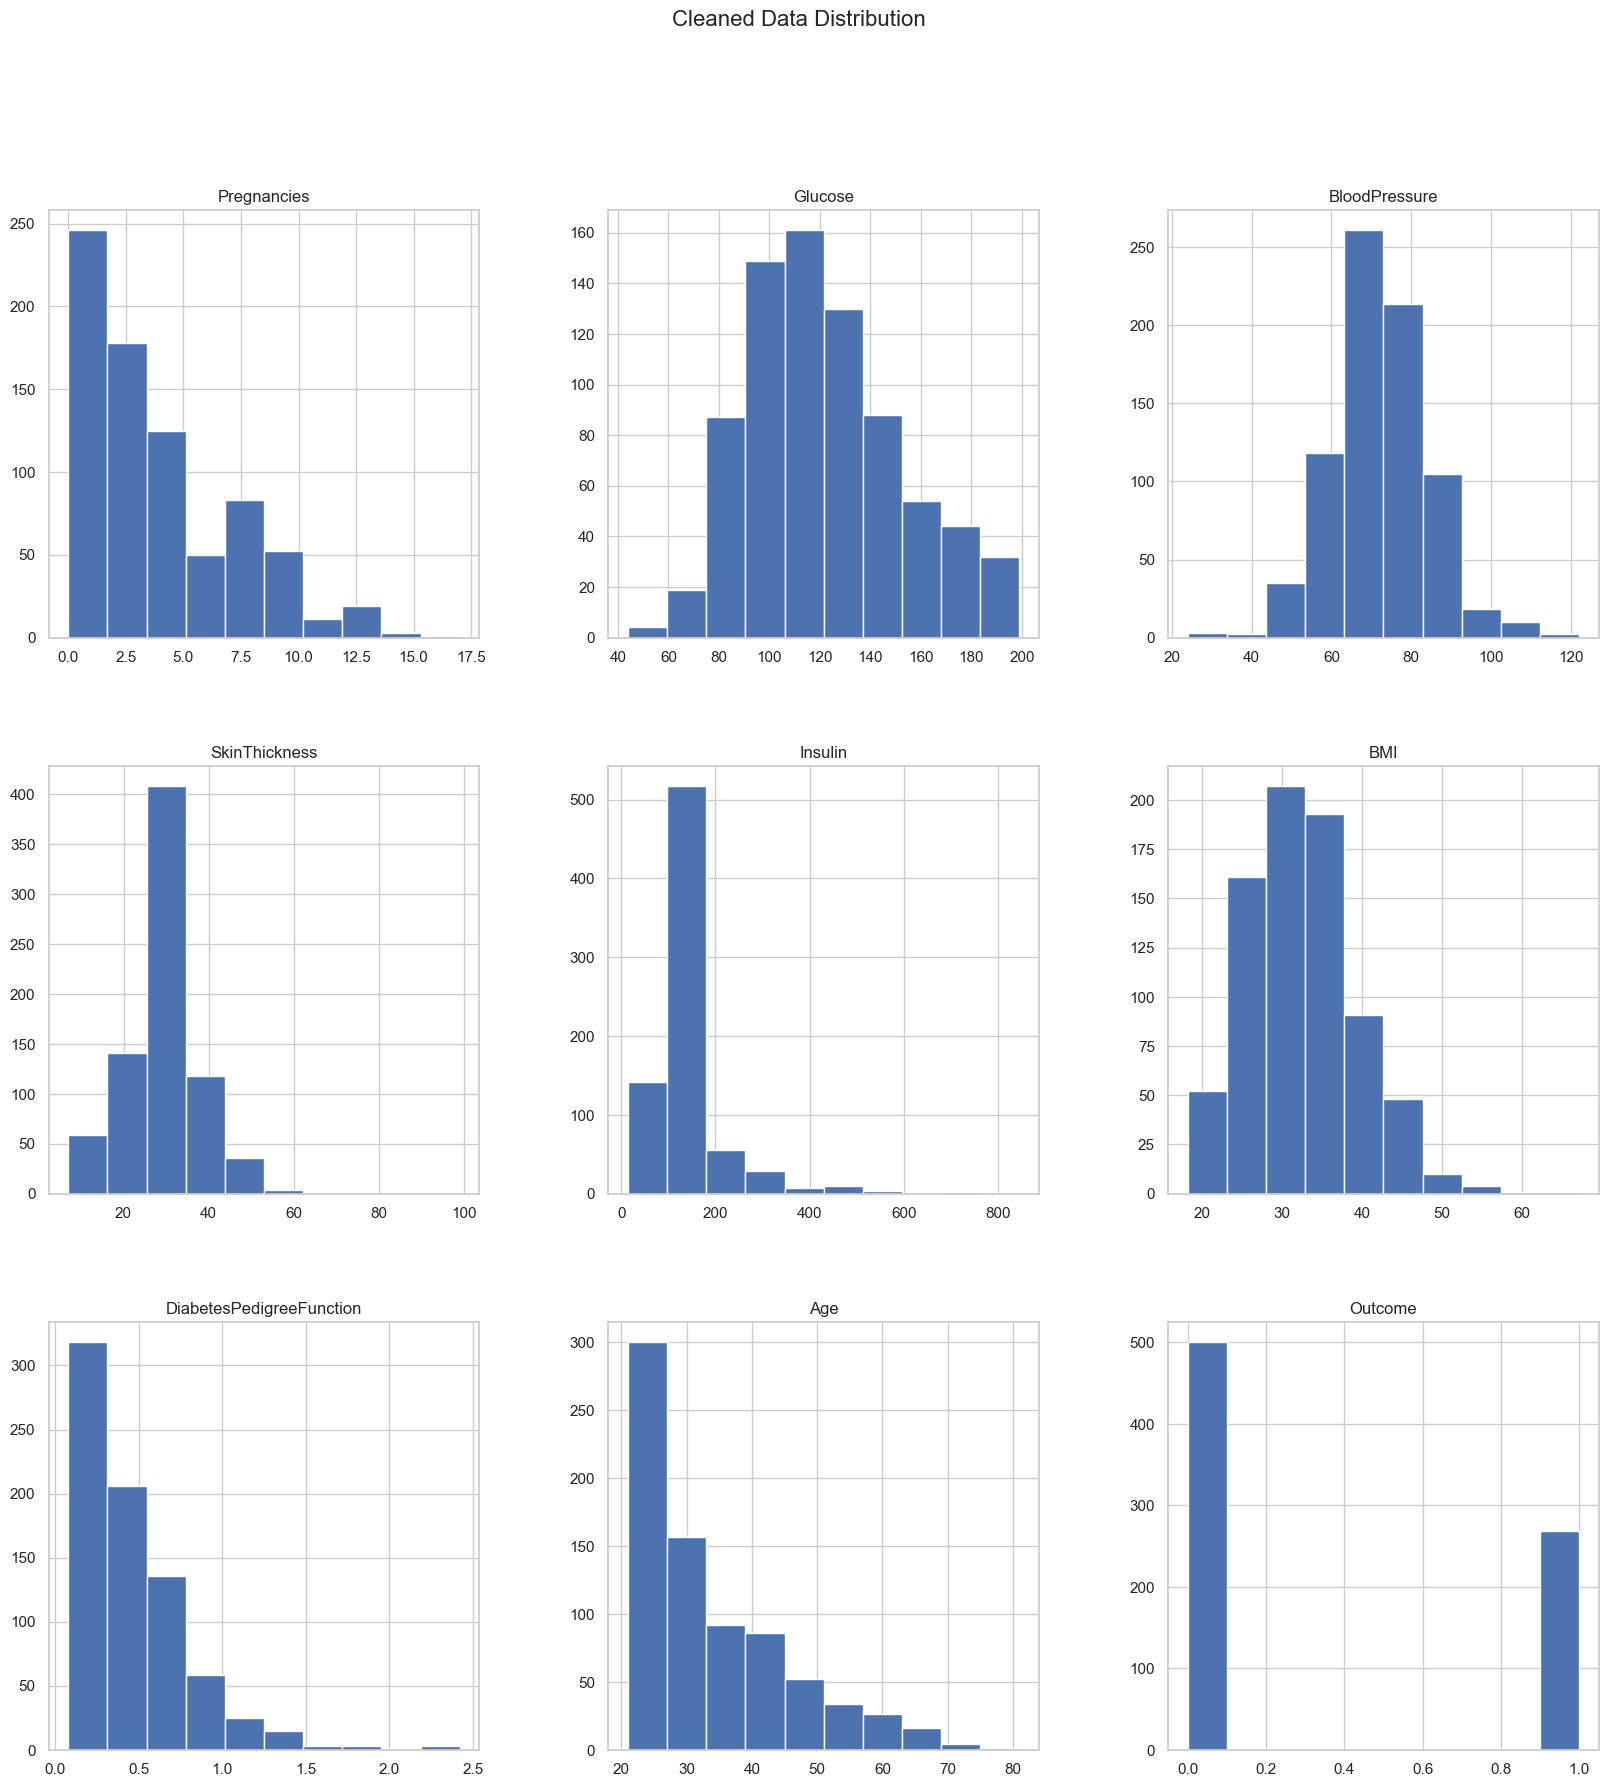

In [10]:
# Cell 7: Plot histogram after cleaning
data_copy.hist(figsize=(20, 20))
plt.suptitle("Cleaned Data Distribution", fontsize=16)
plt.show()


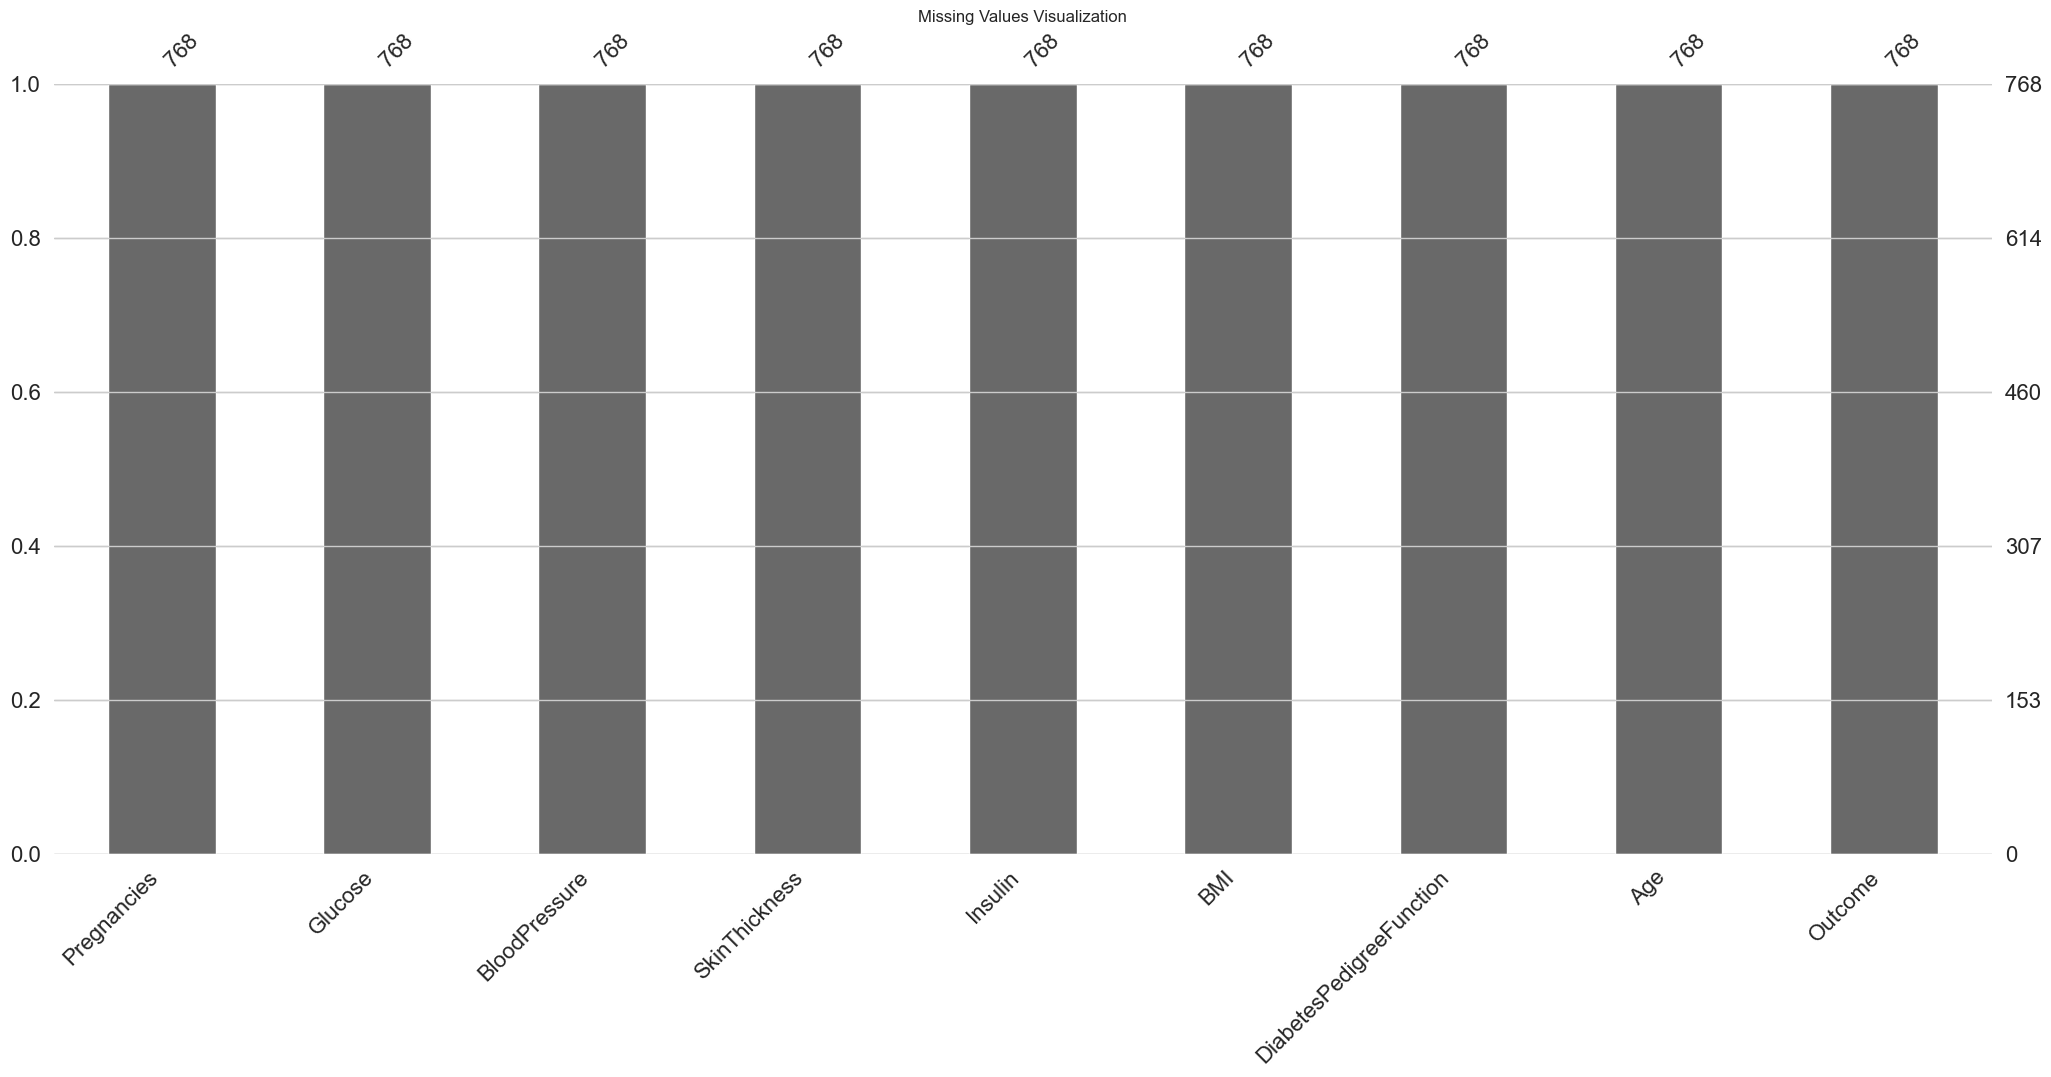

In [11]:
# Cell 8: Visualize missing data using Missingno
msno.bar(data)
plt.title("Missing Values Visualization")
plt.show()


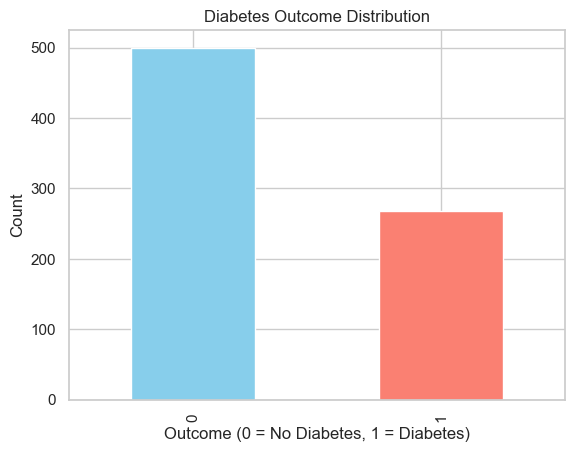

In [12]:
# Cell 9: Plot bar chart of outcome distribution
data.Outcome.value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


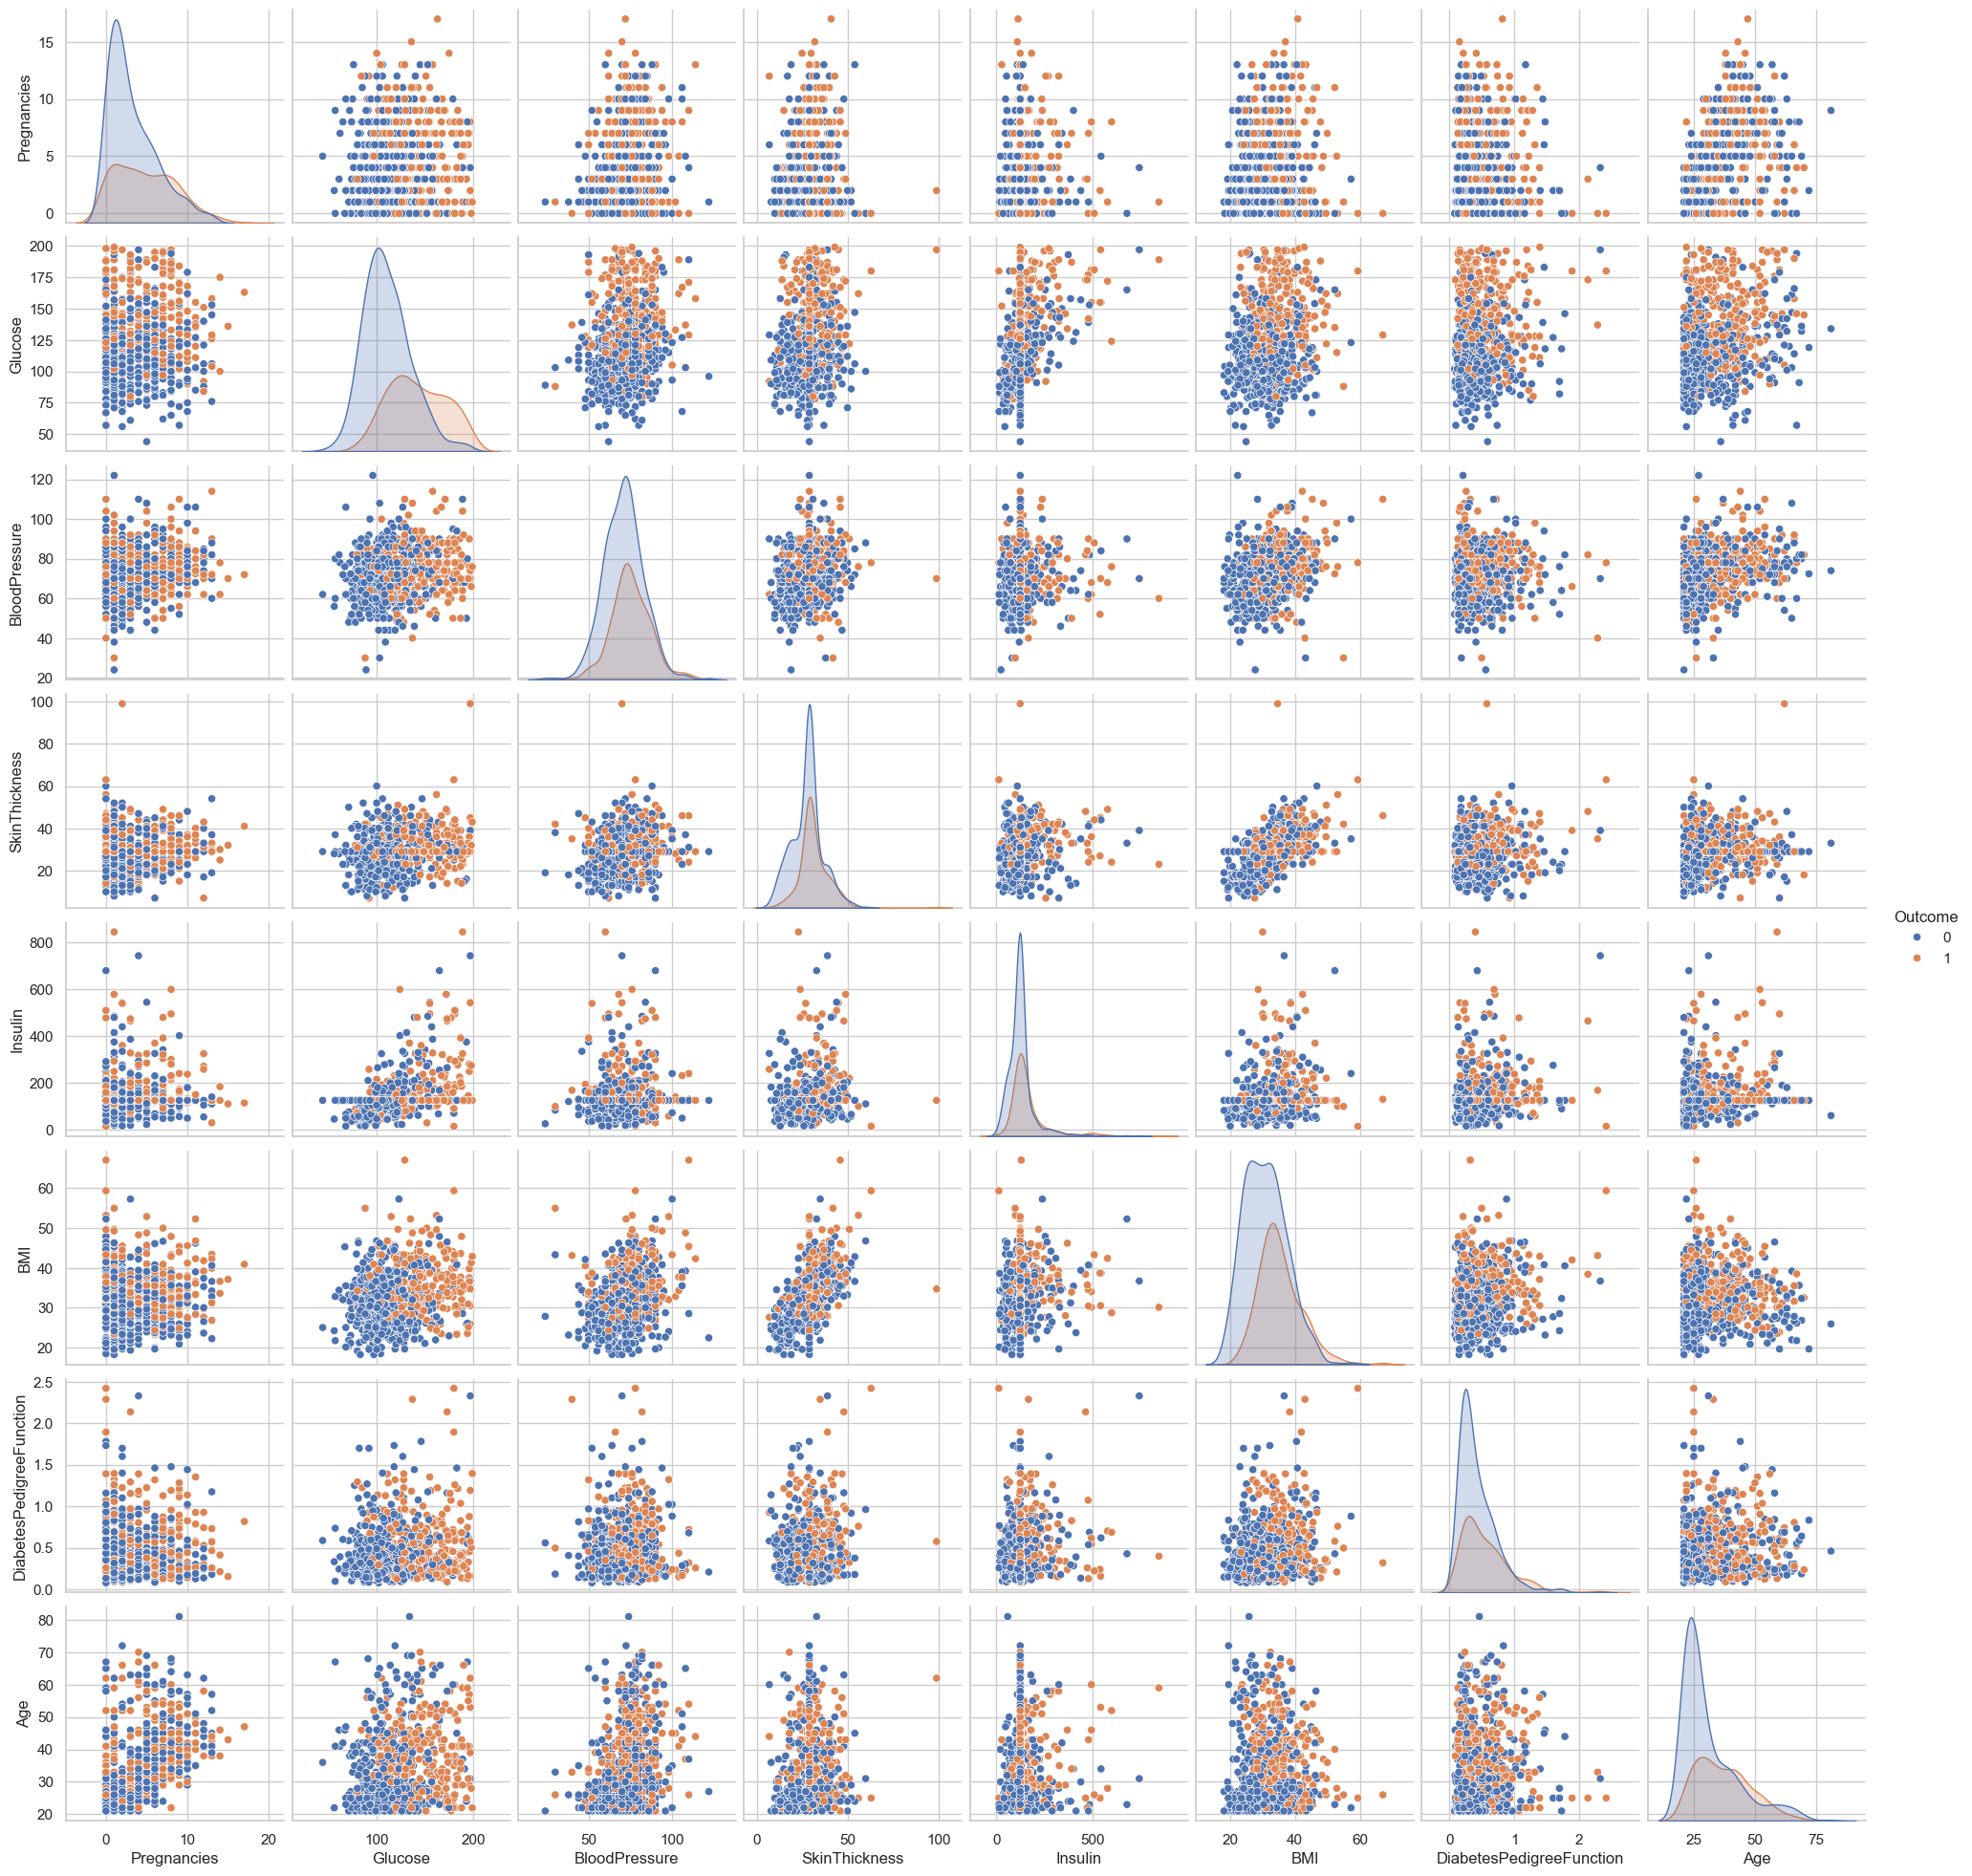

In [13]:
# Cell 10: Pairplot to see relationships
sns.pairplot(data_copy, hue='Outcome')
plt.show()


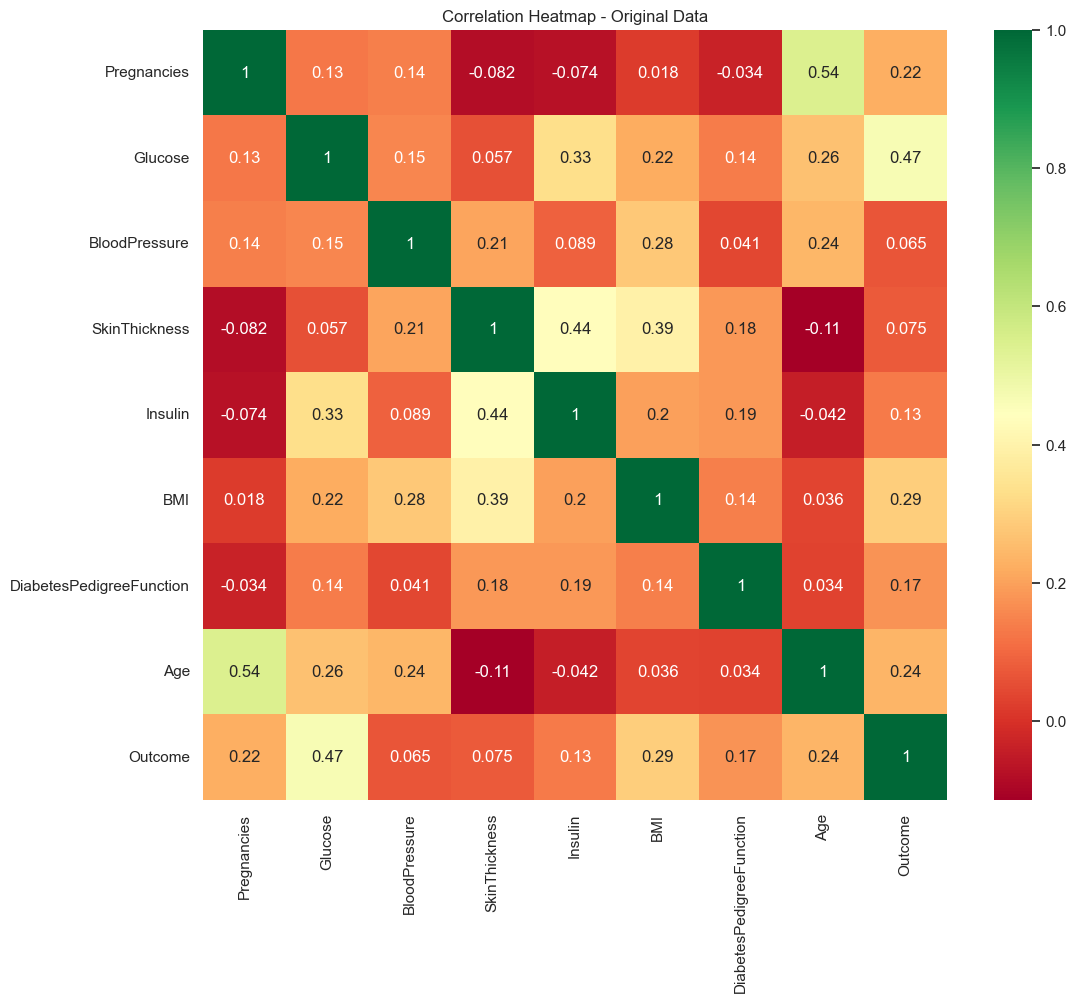

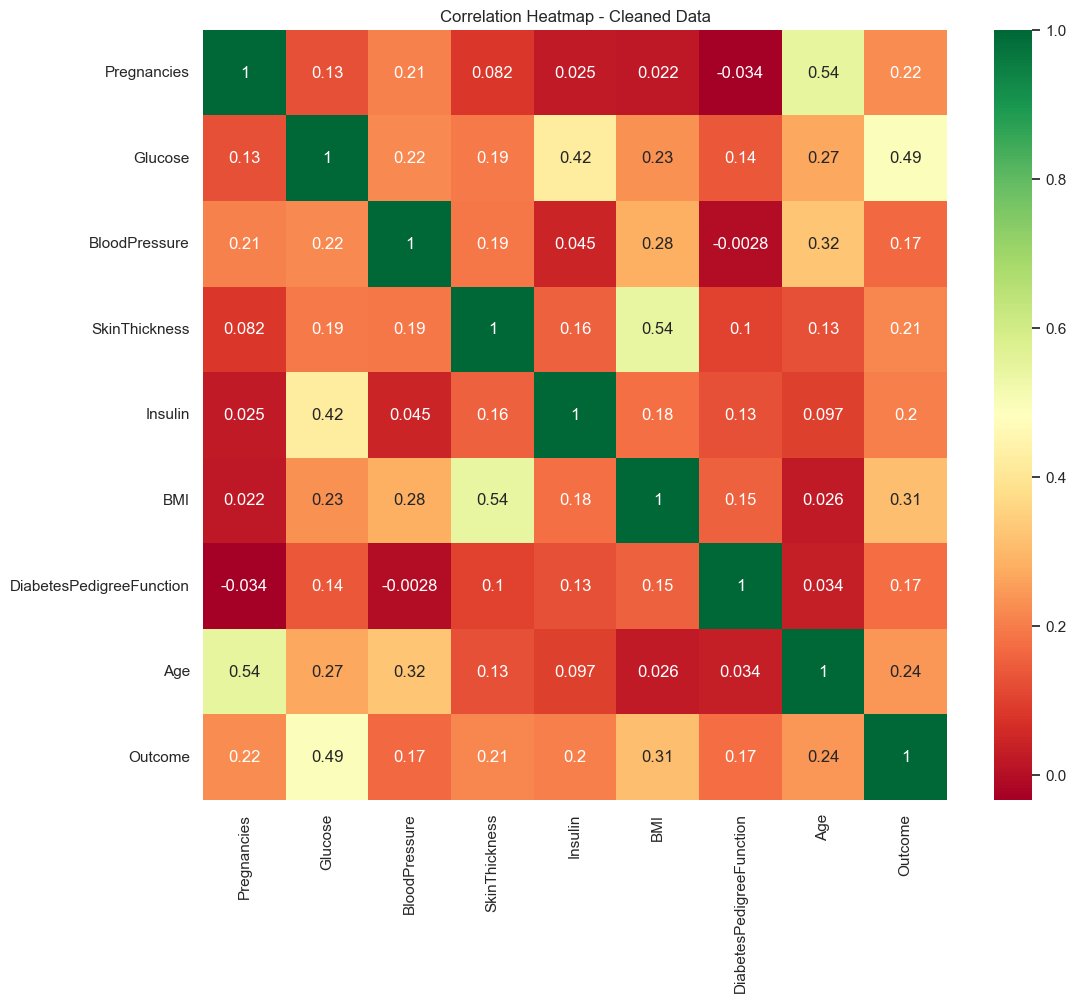

In [14]:
# Cell 11: Correlation Heatmaps for original and cleaned data
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap - Original Data")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(data_copy.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap - Cleaned Data")
plt.show()


In [15]:
# Cell 12: Feature standardization
sc_X = StandardScaler()
X = pd.DataFrame(
    sc_X.fit_transform(data_copy.drop(["Outcome"], axis=1)),
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
)
y = data_copy['Outcome']
print("✅ Features standardized successfully")


✅ Features standardized successfully


In [16]:
# Cell 13: Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42, stratify=y
)
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")


Training Samples: 512
Testing Samples: 256


In [17]:
# Cell 14: Loop to find optimal number of neighbors (K)
train_scores = []
test_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

max_test_score = max(test_scores)
best_k = [i+1 for i, v in enumerate(test_scores) if v == max_test_score]
print(f"\n✅ Max test score: {max_test_score*100:.2f}% at K = {best_k}")



✅ Max test score: 76.56% at K = [11]


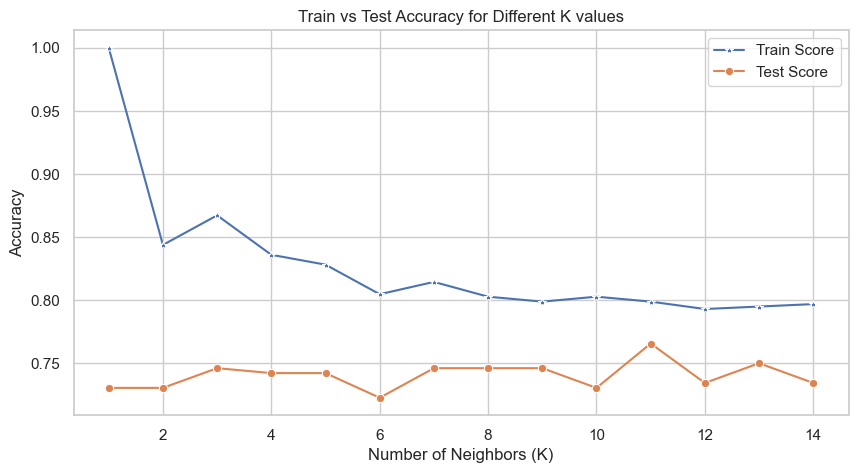

In [18]:
# Cell 15: Plot accuracy for different K values
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.title("Train vs Test Accuracy for Different K values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [19]:
# Cell 16: Train final KNN model using K=11
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
print(f"\n✅ KNN Test Accuracy: {knn.score(X_test, y_test)*100:.2f}%")



✅ KNN Test Accuracy: 76.56%


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


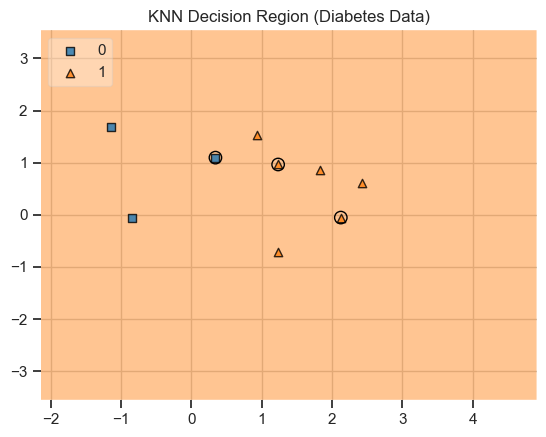

In [20]:
# Cell 17: Visualize decision regions (only 2D projection)
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={i: value for i in range(2, 8)},
                      filler_feature_ranges={i: width for i in range(2, 8)},
                      X_highlight=X_test.values)
plt.title("KNN Decision Region (Diabetes Data)")
plt.show()


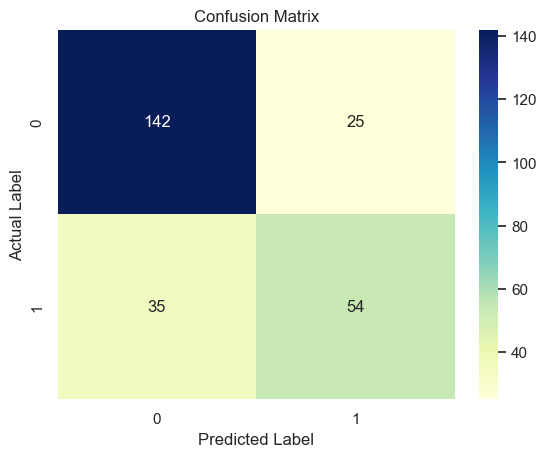

In [21]:
# Cell 18: Confusion matrix visualization
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [22]:
# Cell 19: Define evaluation function
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2.0)
    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                           columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"])
    return results

results = model_evaluation(y_test, y_pred, "KNN")
print("\nModel Evaluation:\n", results)



Model Evaluation:
   Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   KNN  0.765625   0.683544  0.606742  0.642857   0.62069


In [23]:
# Cell 20: Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



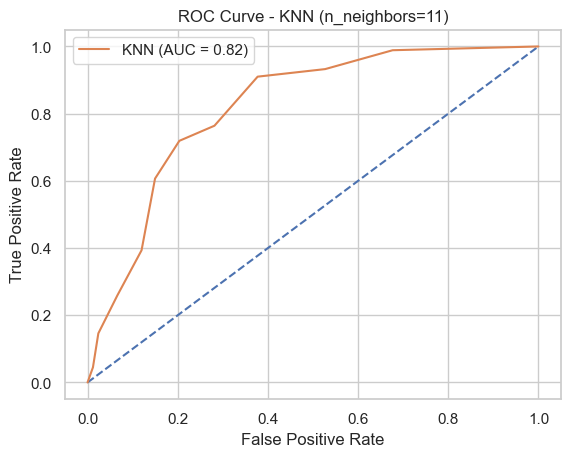

In [24]:
# Cell 21: Plot ROC curve
y_pred_proba = knn.predict_proba(X_test)[:, -1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (n_neighbors=11)')
plt.legend()
plt.show()


In [25]:
# Cell 22: Use GridSearchCV to find best K
param_grid = {"n_neighbors": np.arange(1, 50)}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
knn_gs.fit(X, y)

print("\nBest Parameters from GridSearchCV:", knn_gs.best_params_)
print("Best Cross-Validation Score:", knn_gs.best_score_)



Best Parameters from GridSearchCV: {'n_neighbors': np.int64(25)}
Best Cross-Validation Score: 0.7721840251252015
